In [1]:
""" 
required if not installed:

!pip install textatistic
!pip install -U spacy
!pip install wordcloud
import sys
!{sys.executable} -m spacy download en_core_web_lg

"""

' \nrequired if not installed:\n\n!pip install textatistic\n!pip install -U spacy\n!pip install wordcloud\nimport sys\n!{sys.executable} -m spacy download en_core_web_lg\n\n'

In [40]:
# for Data Manipulation
import pandas as pd
import numpy as np
import os
import csv

# for EDA
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline   
from collections import Counter

# for visualizations
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# for NLP
from textatistic import Textatistic
import spacy
from spacy import displacy

# for Statistics
from scipy import stats

In [3]:
# Use cleaner absolute path to find file
path = os.path.abspath('2020_04_13_politifact_cleaned_data.csv')
df = pd.read_csv(path, index_col=0)

# to see statement in full
pd.set_option('display.max_colwidth', 200)

# See sample of data
df.head(3)

,date,source,statement,veracity
0,2019-10-25,Facebook posts,"Says that in 1770 ""British parliament banned lipstick, saying it had the power to seduce men into marriage, which was classified as witchcraft.""",0
1,2019-10-25,Viral image,"Says Ann Landers said, ""At age 20, we worry about what others think of us. At age 40, we don’t care what they think. At age 60, we discover that they have not been thinking of us at all.""",0
3,2019-10-25,Chain email,"""14,000 abandoned wind turbines litter the United States.""",0


# Dataframe column label explanations
date = date statement was made

source = source of statement

statement = the statement which was evaluated for veracity at https://www.politifact.com

veracity = the truthfulness of a statement

In [4]:
df.veracity.value_counts()

0    7847
1    5350
Name: veracity, dtype: int64

# Preprocessing Steps: Creating a condensed (lemmatized) text
Start: Original Text

1) Lowercasing: Examples -> examples

2) Reduction to root form: examples -> example

End: Lemmatized Text

# Other Text Preprocessing Techniques
removing whitespaces, punctuation, stopwords, special characters (numbers, etc.), html/xml tags

expanding contractions (may not be needed if stopwords removed since contracted words are typically stopwords)

replacing accented characters

correcting spelling errors

In [5]:
nlp = spacy.load('en_core_web_lg')

In [6]:
# lemmatization function
def lemmatize(text):
    # create nlp object
    nobj = nlp(text)
    
    # stopword list from spacy
    stopwords = spacy.lang.en.stop_words.STOP_WORDS
    
    # simple lemmas
    lemmas = [token.lemma_ for token in nobj]
    
    # lowercase; remove non-alphabetic characters & overly used words, i.e., stop words
    a_lemmas = [lemma.lower() for lemma in lemmas
                if lemma.isalpha() 
                and lemma not in stopwords]
    
    # strings
    strings = " ".join(a_lemmas)
    
    return strings

In [7]:
# sample: removes whitespaces, puncuation, stopwords, special characters; converts to lowercase
lemmatize(" ! i don't, won't,   can't not use    NLP 27x maaaah?")

'use nlp maaaah'

In [8]:
df["lemmas"] = df.statement.apply(lemmatize)

In [9]:
df[500:1500:500]

,date,source,statement,veracity,lemmas
574,2019-05-14,Bernie Sanders,"Says Wisconsin payday loans have a 574% average annual interest rate, ""exploitative lending that keeps Americans trapped in debt""",1,wisconsin payday loan average annual interest rate exploitative lending americans trap debt
1164,2018-11-30,PuppetStringNews.com,"""Evidence surfaces of Vatican funding caravans targeting America with cash.""",0,evidence surface vatican funding caravan target america cash


# Tagging Text
POS (parts of speech; POS Tagging): Is this word an adjective, noun, something else?

# Part of Speech (POS) Tagging

## .pos_ (16 tags)
#### .pos_ tags are based on the Google Universal POS Tags (spaCy extends the list)

In [10]:
# .pos_ example
nobj = nlp(df.statement[21])
pos = [(token.text, token.pos_) for token in nobj]
print(pos)

[('"', 'PUNCT'), ('President', 'PROPN'), ('Trump', 'PROPN'), ('has', 'AUX'), ('sent', 'VERB'), ('14,000', 'NUM'), ('American', 'ADJ'), ('troops', 'NOUN'), ('to', 'ADP'), ('the', 'DET'), ('(', 'PUNCT'), ('Middle', 'PROPN'), ('East', 'PROPN'), (')', 'PUNCT'), ('region', 'NOUN'), ('since', 'SCONJ'), ('May.', 'PROPN'), ('So', 'SCONJ'), ('he', 'PRON'), ('ca', 'VERB'), ("n't", 'PART'), ('tell', 'VERB'), ('his', 'DET'), ('political', 'ADJ'), ('rallies', 'NOUN'), ('that', 'SCONJ'), ('he', 'PRON'), ("'s", 'AUX'), ('getting', 'VERB'), ('troops', 'NOUN'), ('out', 'SCONJ'), ('of', 'ADP'), ('endless', 'ADJ'), ('wars', 'NOUN'), ('when', 'ADV'), ('he', 'PRON'), ("'s", 'AUX'), ('sending', 'VERB'), ('14', 'NUM'), ('times', 'NOUN'), ('the', 'DET'), ('amount', 'NOUN'), ('back', 'ADV'), ('into', 'ADP'), ('the', 'DET'), ('region', 'NOUN'), ('.', 'PUNCT'), ('"', 'PUNCT')]


In [11]:
def pos_tagger(text):
    # nlp object
    nobj = nlp(text)
    # POS tags
    tagged_text = [(token.text, token.pos_) for token in nobj]
    # tagged text
    return tagged_text

%time df["pos_tags"] = df.statement.apply(pos_tagger)

CPU times: user 2min 46s, sys: 2.72 s, total: 2min 48s
Wall time: 3min 8s


In [12]:
df[["pos_tags"]][0:2]

,pos_tags
0,"[(Says, VERB), (that, SCONJ), (in, ADP), (1770, NUM), ("", PUNCT), (British, ADJ), (parliament, NOUN), (banned, VERB), (lipstick, NOUN), (,, PUNCT), (saying, VERB), (it, PRON), (had, AUX), (the, DE..."
1,"[(Says, VERB), (Ann, PROPN), (Landers, PROPN), (said, VERB), (,, PUNCT), ("", PUNCT), (At, ADP), (age, NOUN), (20, NUM), (,, PUNCT), (we, PRON), (worry, VERB), (about, ADP), (what, PRON), (others, ..."


In [13]:
# a more visual rendering of the above
displacy.render(nobj, 
                style = "dep", # styles are dep (dependency) or ent (entity)
                jupyter = True,
                options = {
                          "distance" : 125,
                          "arrow_stroke" : 2, # thickness of arrow line
                          "arrow_width" : 8, # thickness of arrow head
                          "bg" : "#EDEDED" # background color
                         })

the tagger works

# Feature Engineering
No. of letters

No. of words

Avg. length of words

Readability Tests

In [14]:
# no. of letters
df["numb_of_letters"] = df.statement.apply(len)

In [15]:
# no. of words function
def word_counter(text):
    
    # split text by blank spaces
    words = text.split()
    
    # count words
    return len(words)

In [16]:
# no. of words
df["numb_of_words"] = df.statement.apply(word_counter)

In [17]:
# avg. word length function
def avg_word_length(text):
    
    # split text into words
    words = text.split()
    
    # length of each word
    word_lengths = [len(w) for w in words] 
    
    # avg length
    avg_length = sum(word_lengths)/len(word_lengths)     
    return round((avg_length),1)

In [18]:
# avg. word length
df["avg_word_len"] = df.statement.apply(avg_word_length)

In [19]:
# readability func
def readability(text):    
    # scores
    readability_scores = Textatistic(text).scores
    """ 
    Gunning Fog Score depends on sentence length and syllable amount
    17 = College Graduate
    ...
    6 = 6th grade
    """
    gunningfog_score = readability_scores["gunningfog_score"]
    return gunningfog_score

# with try and except
# b/c some sentences do not end with a period
def readability_try(text):
    try:
        return round(readability(text),1)
    except ZeroDivisionError:
        return 0

In [20]:
# readability scores
%time df["read_score_gun"] = df.statement.apply(readability_try)

CPU times: user 24.5 s, sys: 256 ms, total: 24.8 s
Wall time: 25.9 s


In [21]:
df[10:100:50]

,date,source,statement,veracity,lemmas,pos_tags,numb_of_letters,numb_of_words,avg_word_len,read_score_gun
12,2019-10-24,Viral image,Says a photo shows a driver and passengers wearing moose heads in a truck with a man strapped to the roof that caused 16 accidents on I-35.,0,photo driver passenger wear moose head truck man strap roof cause accident,"[(Says, VERB), (a, DET), (photo, NOUN), (shows, VERB), (a, DET), (driver, NOUN), (and, CCONJ), (passengers, NOUN), (wearing, VERB), (moose, NOUN), (heads, NOUN), (in, ADP), (a, DET), (truck, NOUN)...",139,27,4.2,14.1
66,2019-10-09,Donald Trump,"""The first so-called second hand information ‘Whistleblower’ got my phone conversation almost completely wrong.""",0,second hand information whistleblower phone conversation completely wrong,"[("", PUNCT), (The, DET), (first, ADJ), (so, ADV), (-, PUNCT), (called, VERB), (second, ADJ), (hand, NOUN), (information, NOUN), (‘, PUNCT), (Whistleblower, NOUN), (’, PUNCT), (got, VERB), (my, DET...",112,14,7.1,11.3


# Automating POS tag counts

### .pos_ tag's dictionary and list

In [22]:
# first we need a dictionary and list of all the possible tags
# csv made from https://spacy.io/api/annotation#pos-tagging
# here's a df of all .pos_ tags for ease of readabilty
path = os.path.abspath('pos.csv')
pos_df = pd.read_csv(path)
pos_df[["POS","description"]][0:]

,POS,description
0,ADJ,adjective
1,ADP,conjunction or particle or adverb
2,ADV,adverb
3,CCONJ,coordinating conjuction
4,DET,determiner
5,INTJ,interjection
6,NOUN,noun
7,NUM,number
8,PART,possessive
9,PRON,pronoun


In [23]:
# .pos_ tags in dictionary form
with open('pos.csv', mode='r') as infile:
    reader = csv.reader(infile)
    with open('pos_dict.csv', mode='w') as outfile:
        writer = csv.writer(outfile)
        mydict_pos = {rows[0]:rows[1] for rows in reader}

In [24]:
# preview dictionary
list(mydict_pos.items())[0:]

[('POS', 'description'),
 ('ADJ', 'adjective'),
 ('ADP', 'conjunction or particle or adverb'),
 ('ADV', 'adverb'),
 ('CCONJ', 'coordinating conjuction'),
 ('DET', 'determiner'),
 ('INTJ', 'interjection'),
 ('NOUN', 'noun'),
 ('NUM', 'number'),
 ('PART', 'possessive'),
 ('PRON', 'pronoun'),
 ('PROPN', 'proper noun'),
 ('PUNCT', 'punctuation'),
 ('SPACE', 'space'),
 ('SYM', 'symbol'),
 ('VERB', 'verb'),
 ('X', 'unknown')]

In [25]:
# delete first entry in dict, i.e., column labels
del mydict_pos["POS"]

In [26]:
# we'll use this to automate later tasks
pos_list = list(mydict_pos.keys())
print(pos_list[0:])

['ADJ', 'ADP', 'ADV', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SPACE', 'SYM', 'VERB', 'X']


In [27]:
def pos_counter(text, tag):
    # nlp object
    nobj = nlp(text)
    # list of POS tags
    pos = [token.pos_ for token in nobj]
    # count POS
    return pos.count(tag)

In [47]:
# loop through the list of .pos_ tags and create new columns with counts for each tag
""" this takes over 45 minutes """
for tag in pos_list:
    %time df[("count_of_"+mydict_pos[tag])] = df.statement.apply(lambda text : pos_counter(text, tag))
    %time df[("freq_of_"+mydict_pos[tag])] = df[("count_of_"+mydict_pos[tag])]/df.numb_of_words

CPU times: user 2min 22s, sys: 1.71 s, total: 2min 24s
Wall time: 2min 27s
CPU times: user 2min 22s, sys: 1.46 s, total: 2min 23s
Wall time: 2min 26s
CPU times: user 2min 22s, sys: 1.48 s, total: 2min 24s
Wall time: 2min 27s
CPU times: user 2min 14s, sys: 939 ms, total: 2min 15s
Wall time: 2min 16s
CPU times: user 2min 13s, sys: 789 ms, total: 2min 14s
Wall time: 2min 14s
CPU times: user 2min 14s, sys: 868 ms, total: 2min 15s
Wall time: 2min 15s
CPU times: user 2min 16s, sys: 762 ms, total: 2min 17s
Wall time: 2min 17s
CPU times: user 2min 12s, sys: 782 ms, total: 2min 13s
Wall time: 2min 13s
CPU times: user 2min 12s, sys: 785 ms, total: 2min 13s
Wall time: 2min 13s
CPU times: user 2min 13s, sys: 863 ms, total: 2min 14s
Wall time: 2min 14s
CPU times: user 2min 14s, sys: 963 ms, total: 2min 15s
Wall time: 2min 16s
CPU times: user 2min 13s, sys: 834 ms, total: 2min 14s
Wall time: 2min 14s
CPU times: user 2min 12s, sys: 785 ms, total: 2min 13s
Wall time: 2min 13s
CPU times: user 2min 13s,

In [48]:
# to see df in full
pd.set_option('display.max_columns', 200)
df.head(2)

,date,source,statement,veracity,lemmas,pos_tags,numb_of_letters,numb_of_words,avg_word_len,read_score_gun,freq_of_adjective,freq_of_conjunction or particle or adverb,freq_of_adverb,freq_of_coordinating conjuction,freq_of_determiner,freq_of_interjection,freq_of_noun,freq_of_number,freq_of_possessive,freq_of_pronoun,freq_of_proper noun,freq_of_punctuation,freq_of_space,freq_of_symbol,freq_of_verb,freq_of_unknown,count_of_adjective,count_of_conjunction or particle or adverb,count_of_adverb,count_of_coordinating conjuction,count_of_determiner,count_of_interjection,count_of_noun,count_of_number,count_of_possessive,count_of_pronoun,count_of_proper noun,count_of_punctuation,count_of_space,count_of_symbol,count_of_verb,count_of_unknown
0,2019-10-25,Facebook posts,"Says that in 1770 ""British parliament banned lipstick, saying it had the power to seduce men into marriage, which was classified as witchcraft.""",0,british parliament ban lipstick power seduce man marriage classify witchcraft,"[(Says, VERB), (that, SCONJ), (in, ADP), (1770, NUM), ("", PUNCT), (British, ADJ), (parliament, NOUN), (banned, VERB), (lipstick, NOUN), (,, PUNCT), (saying, VERB), (it, PRON), (had, AUX), (the, DE...",144,23,5.3,12.7,0.043478,0.086957,0.000000,0.0,0.086957,0.0,0.260870,0.043478,0.043478,0.043478,0.000000,0.217391,0.0,0.0,0.217391,0.0,1,2,0,0,2,0,6,1,1,1,0,5,0,0,5,0
1,2019-10-25,Viral image,"Says Ann Landers said, ""At age 20, we worry about what others think of us. At age 40, we don’t care what they think. At age 60, we discover that they have not been thinking of us at all.""",0,ann landers age worry think age care think age discover think,"[(Says, VERB), (Ann, PROPN), (Landers, PROPN), (said, VERB), (,, PUNCT), ("", PUNCT), (At, ADP), (age, NOUN), (20, NUM), (,, PUNCT), (we, PRON), (worry, VERB), (about, ADP), (what, PRON), (others, ...",187,39,3.8,5.2,0.000000,0.153846,0.051282,0.0,0.000000,0.0,0.102564,0.076923,0.051282,0.230769,0.051282,0.230769,0.0,0.0,0.205128,0.0,0,6,2,0,0,0,4,3,2,9,2,9,0,0,8,0


# Statistics

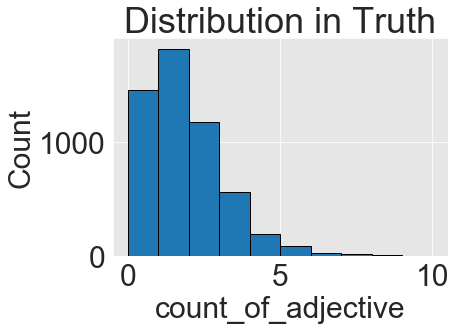

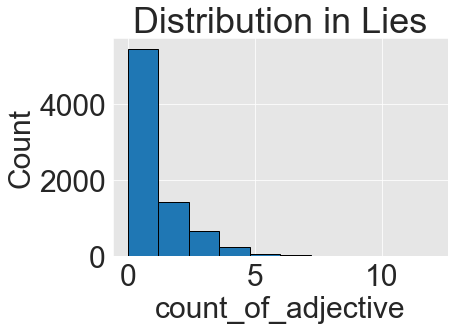

In [65]:
def plot_pos(column):
    #plot truths distribution
    truths = df[df.veracity == 1]
    truths[column].hist(
        bins=10, 
        edgecolor='black')

    plt.title("Distribution in Truth")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()
    
    #plot lies distribution
    lies = df[df.veracity == 0]

    lies[column].hist(
        bins=10, 
        edgecolor='black')

    plt.title("Distribution in Lies")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()
    
plot_pos("count_of_adjective")

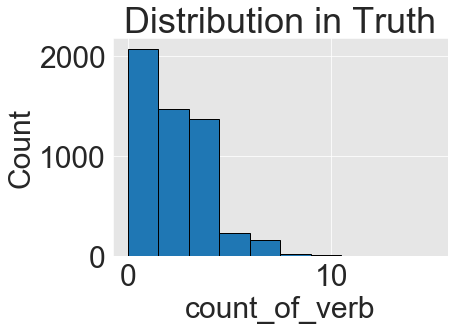

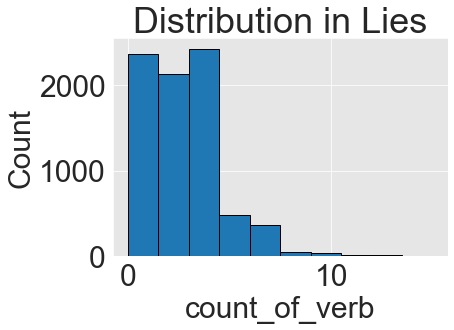

In [66]:
plot_pos("count_of_verb")

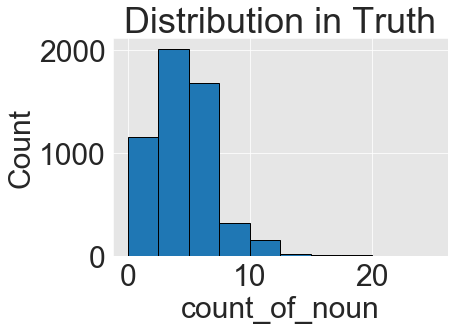

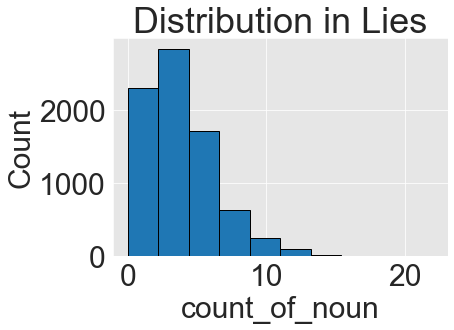

In [67]:
plot_pos("count_of_noun")

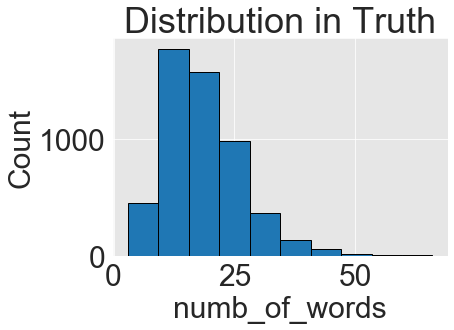

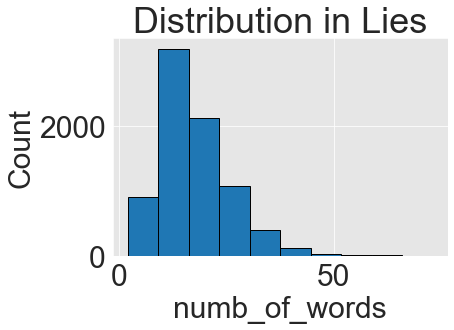

In [68]:
plot_pos("numb_of_words")

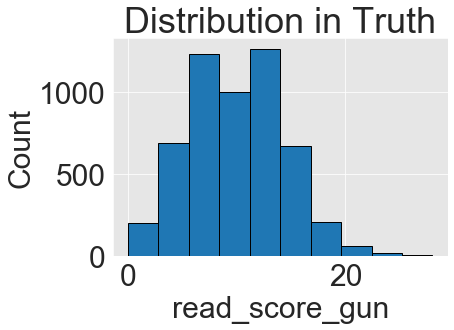

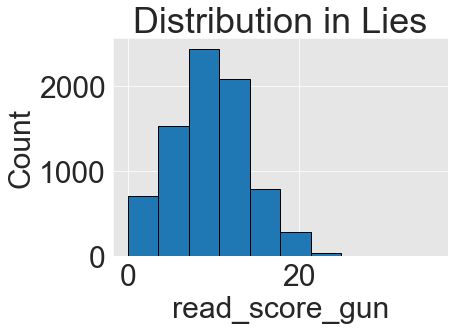

In [69]:
plot_pos("read_score_gun")

In [ ]:
# func for comparing truth vs lie
def tvsf(column_label):
    
    # t & f variables
    truths = df[df['veracity'] == 1][column_label]
    falsehoods = df[df['veracity'] == 06][column_label]
    
    # means
    truths_mean = round(truths.mean(), 1)
    falsehoods_mean = round(falsehoods.mean(), 1)
    
    # t-test
    t,p = stats.ttest_ind(truths,
                          falsehoods, 
                          equal_var = False)
    if p <= 0.05:
        print("!!! SIGNIFICANT !!!")
        print(column_label, "p-value:", "{:.3f}".format(p))
    else:
        print("-Not Sgnfcnt-")
        print(column_label, "p-value:", "{:.3f}".format(p))
    print("T Avg.", column_label, ":", truths_mean)
    print("F Avg.", column_label, ":", falsehoods_mean)

In [ ]:
tvsf("statement_char_count")

In [ ]:
tvsf("statement_word_count")

In [ ]:
tvsf("statement_avg_word_len")

In [ ]:
tvsf("read_score_gun")

# POS Statistics

### .pos_

In [ ]:
""" 
since the tvsf function output would be difficult to read, let's convert to a dataframe output
"""

# func for comparing truth vs lie
def df_tvsf(tag_type, column_dict, index_list):
    #ex: df_tvsf("pos_", mydict_pos, dot_pos_list)
    
    d = []
    for x in index_list:
        
        # t & f variables
        truths = df[df['veracity'] == 'True'][tag_type+column_dict[x]]
        falsehoods = df[df['veracity'] == 'False'][tag_type+column_dict[x]]

        # means
        truths_mean = round(truths.mean(), 2)
        falsehoods_mean = round(falsehoods.mean(), 2)

        # t-test
        t,p = stats.ttest_ind(truths,
                              falsehoods, 
                              equal_var = False)
        # dataframe
        d.append({'t_means' : truths_mean, 
                  'f_means' : falsehoods_mean, 
                  'p_value' : round(p,3)})
        
    return pd.DataFrame(d, index = column_dict.values())[['Truth_Avg_Freq', 'Lie_Avg_Freq', 'p_value']]

In [ ]:
# return df with probability values that approach or are significant
pos_df = df_tvsf("pos_", mydict_pos, pos_list)
pos_df[pos_df.p_value < 0.05]

# Word Clouds to visualize top words in dataset

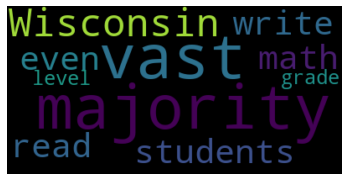

In [70]:
# generate word cloud from first statement we have (#18)
text = df.statement[18]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Uncomment to save file
#wordcloud.to_file("all_doc_cloud.png")

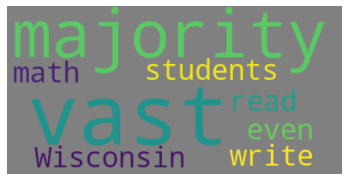

In [71]:
# changing settings
wordcloud = WordCloud(min_font_size=30, 
                      max_font_size=100, 
                      max_words=20, 
                      background_color="grey").generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

There are 1444644 words in the combination of all statements.


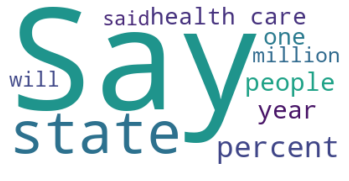

In [72]:
# Combine documents
text = " ".join( _ for _ in df.statement)
print ("There are", len(text) ,"words in the combination of all statements.")

# Generate image
wordcloud = WordCloud(min_font_size=24, 
                      max_font_size=1000, 
                      max_words=100, 
                      background_color="white").generate(text)

# Display image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [73]:
# wordcloud function for readability
def word_cloud(column):
    
    # Combine documents
    text = " ".join( _ for _ in column)
    
    # Sanity check
    print ("There are", len(text) ,"words")

    # Generate image
    plt.figure(figsize=(12, 10))
    wordcloud = WordCloud(min_font_size=5, 
                          max_font_size=60, 
                          max_words=20, 
                          background_color="white").generate(text)

    # Display the generated image
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## Truth Word Clouds

There are 595203 words


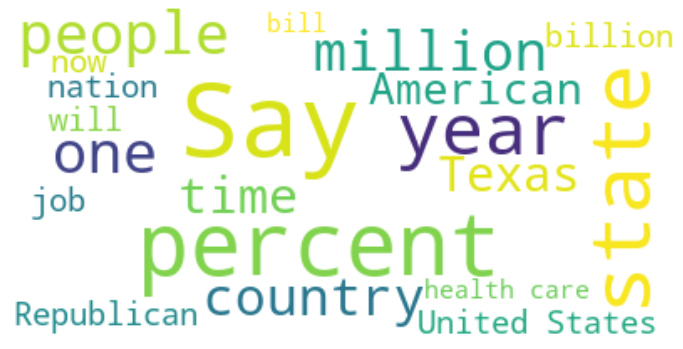

In [76]:
word_cloud(df[df.veracity == 1].statement)

There are 344766 words


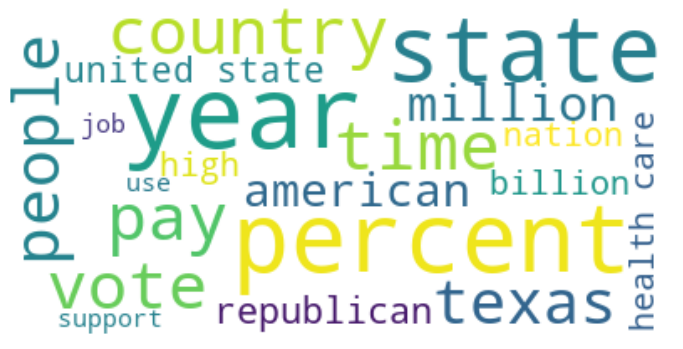

In [77]:
word_cloud(df[df.veracity == 1].lemmas)

## Falsehood Word Clouds

There are 849440 words


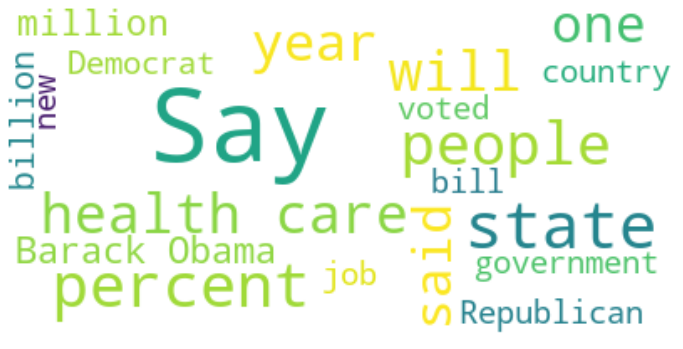

In [79]:
word_cloud(df[df.veracity == 0].statement)

There are 509244 words


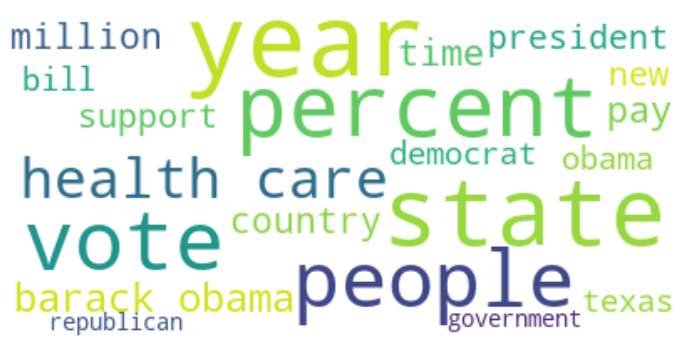

In [78]:
word_cloud(df[df.veracity == 0].lemmas)

### I find it odd that all clouds contain the words year and percent
### Let's verify with another method

In [80]:
# counter func and list of words to check
def cnt(col,r):
    # returns total # of times word occured in all statements
    return Counter(col.statement.str.contains(r))[True]

lst = [r"year", r"percent", r"state", r"American", r"half", r"Trump"]

In [85]:
# frequency func
def freq_check(df):
    # returns word and its frequency
    for r in lst:
        print(r, "freq:", cnt(df, r))

In [86]:
freq_check(df[df.veracity == 1])

year freq: 685
percent freq: 686
state freq: 570
American freq: 304
half freq: 123
Trump freq: 152


In [87]:
freq_check(df[df.veracity == 0])

year freq: 683
percent freq: 479
state freq: 553
American freq: 271
half freq: 60
Trump freq: 367


### results of the wordcloud were verified

In [88]:
# move veracity to the end of the dataframe for convenience
final_df = df[[cols for cols in df if cols not in ['veracity']] + ['veracity']]
final_df[200:1000:200]

,date,source,statement,lemmas,pos_tags,numb_of_letters,numb_of_words,avg_word_len,read_score_gun,freq_of_adjective,freq_of_conjunction or particle or adverb,freq_of_adverb,freq_of_coordinating conjuction,freq_of_determiner,freq_of_interjection,freq_of_noun,freq_of_number,freq_of_possessive,freq_of_pronoun,freq_of_proper noun,freq_of_punctuation,freq_of_space,freq_of_symbol,freq_of_verb,freq_of_unknown,count_of_adjective,count_of_conjunction or particle or adverb,count_of_adverb,count_of_coordinating conjuction,count_of_determiner,count_of_interjection,count_of_noun,count_of_number,count_of_possessive,count_of_pronoun,count_of_proper noun,count_of_punctuation,count_of_space,count_of_symbol,count_of_verb,count_of_unknown,veracity
223,2019-08-23,Viral image,"""Popeyes manager arrested for allegedly dipping chicken in cocaine based flour to increase business sales.""",popeyes manager arrest allegedly dip chicken cocaine base flour increase business sale,"[("", PUNCT), (Popeyes, PROPN), (manager, NOUN), (arrested, VERB), (for, ADP), (allegedly, ADV), (dipping, VERB), (chicken, NOUN), (in, ADP), (cocaine, NOUN), (based, VERB), (flour, NOUN), (to, PAR...",107,15,6.2,6.0,0.000000,0.133333,0.066667,0.0,0.000000,0.0,0.400000,0.0,0.066667,0.0,0.066667,0.200000,0.0,0.0,0.266667,0.0,0,2,1,0,0,0,6,0,1,0,1,3,0,0,4,0,0
457,2019-06-19,Creigh Deeds,"Red-flag laws have been ""shown to reduce the number of suicides by firearms.""",red flag law reduce number suicide firearm,"[(Red, ADJ), (-, PUNCT), (flag, NOUN), (laws, NOUN), (have, AUX), (been, AUX), ("", PUNCT), (shown, VERB), (to, PART), (reduce, VERB), (the, DET), (number, NOUN), (of, ADP), (suicides, NOUN), (by, ...",77,13,5.0,5.6,0.076923,0.153846,0.000000,0.0,0.076923,0.0,0.384615,0.0,0.076923,0.0,0.000000,0.307692,0.0,0.0,0.153846,0.0,1,2,0,0,1,0,5,0,1,0,0,4,0,0,2,0,1
687,2019-04-16,Facebook posts,"A video clip from the Notre Dame cathedral fire shows a man walking alone in a tower of the church ""dressed in Muslim garb.""",video clip notre dame cathedral fire man walk tower church dress muslim garb,"[(A, DET), (video, NOUN), (clip, NOUN), (from, ADP), (the, DET), (Notre, PROPN), (Dame, PROPN), (cathedral, NOUN), (fire, NOUN), (shows, VERB), (a, DET), (man, NOUN), (walking, VERB), (alone, ADV)...",124,24,4.2,9.6,0.041667,0.166667,0.041667,0.0,0.208333,0.0,0.333333,0.0,0.000000,0.0,0.083333,0.125000,0.0,0.0,0.125000,0.0,1,4,1,0,5,0,8,0,0,0,2,3,0,0,3,0,0
927,2019-02-21,Facebook posts,A photo of Trump having a stroke is really a virus that will wipe out all information on your computer.,photo trump stroke virus wipe information computer,"[(A, DET), (photo, NOUN), (of, ADP), (Trump, PROPN), (having, VERB), (a, DET), (stroke, NOUN), (is, AUX), (really, ADV), (a, DET), (virus, NOUN), (that, DET), (will, VERB), (wipe, VERB), (out, ADP...",103,20,4.2,10.0,0.000000,0.150000,0.050000,0.0,0.300000,0.0,0.250000,0.0,0.000000,0.0,0.050000,0.050000,0.0,0.0,0.150000,0.0,0,3,1,0,6,0,5,0,0,0,1,1,0,0,3,0,0


In [89]:
final_df.to_csv("politifact_post_eda_MORE_DATA")